In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[-1.90199764, -3.52956243],
       [-1.98393837, -3.57768991],
       [-9.70183114, -6.02341839],
       ...,
       [-9.65961562, -6.01237169],
       [-8.61886216, -6.1579854 ],
       [-2.74729721, -5.85448802]])

In [4]:
y

array([0, 0, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 0, 1, 0, 1, 0, 2, 1,
       2, 2, 2, 2, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 0,
       1, 2, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2,
       1, 2, 0, 0, 0, 2, 2, 1, 0, 1, 2, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 1, 1, 0, 2, 0, 2, 1, 1, 2, 0, 2, 2,
       0, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 2, 0, 2, 2, 1, 0, 2,
       2, 0, 0, 2, 2, 0, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 2, 1, 2, 0,
       1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2,
       0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 0,
       0, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2, 0, 0,
       1, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 1, 2,
       0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 2, 1, 1, 2,
       1, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1, 0, 1, 2, 1,

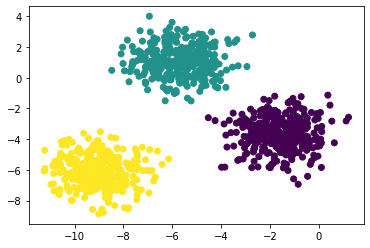

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)

In [9]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [12]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [14]:
from sklearn.cluster import KMeans

In [15]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [16]:
wcss

[1340.0000000000023,
 571.2724981447043,
 129.06920301404648,
 112.8929467989705,
 98.43762944408469,
 84.2587068347742,
 75.1016410696618,
 66.33725974517868,
 58.10165910172263,
 52.30910767336157]

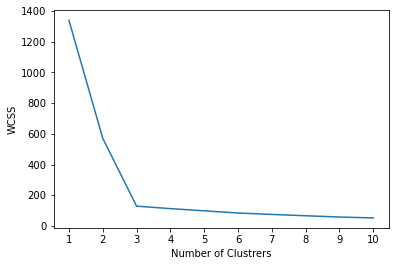

In [17]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [18]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [19]:
kmeans.fit_predict(X_train_scaled)

array([0, 0, 0, 2, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 0,
       2, 1, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0,
       2, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 0, 1, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 2,
       1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2, 2,
       2, 0, 2, 1, 2, 2, 0, 1, 0, 2, 0, 2, 1, 1, 2, 2, 1, 1, 0, 0, 1, 0,
       2, 0, 1, 0, 1, 2, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 0, 2, 1, 0, 2,
       2, 1, 2, 2, 0, 1, 0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0,
       1, 2, 2, 0, 0, 0, 1, 1, 2, 0, 2, 0, 2, 2, 1, 2, 2, 0, 0, 0, 1, 2,
       0, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 1, 1,
       2, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 2, 2, 2, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 0, 2, 2,
       0, 0, 1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 1, 0, 1, 2, 1,
       2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 1, 2,

In [21]:
y_pred=kmeans.predict(X_test_scaled)

In [22]:
y_pred

array([2, 2, 2, 0, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 0, 0, 1, 2, 0, 0, 1,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 2,
       2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2,
       2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 1,
       2, 0, 1, 0, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 1,
       1, 1, 0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 1, 0, 0, 2, 1, 2, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 1, 1, 0, 1, 1, 0, 1,
       0, 2, 0, 2, 1, 1, 2, 1, 2, 0, 1, 2, 0, 2, 2, 0, 2, 1, 1, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
       1, 1, 2, 0, 2, 0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1,
       0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 0, 1, 1, 1, 0, 2, 0, 1, 1,
       0, 0, 2, 0, 0, 1, 2, 1, 2, 2, 1, 1, 2, 0, 1,

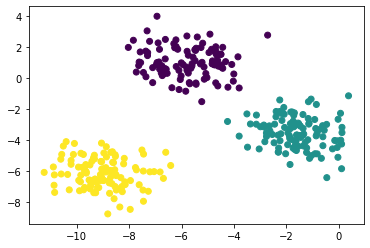

In [23]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [25]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [26]:
## kneelocator
!pip install kneed

In [27]:
from kneed import KneeLocator

In [28]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [29]:
kl.elbow

3

In [30]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [31]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [32]:
silhouette_coefficients

[0.5791208264052049,
 0.7345149600137074,
 0.590061277437689,
 0.46306511562346064,
 0.3194384017662996,
 0.3260433893207664,
 0.3295975251169475,
 0.33870715403767093,
 0.33711491411125977]

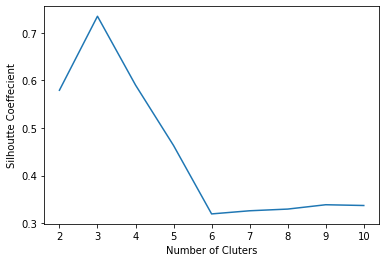

In [33]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()